# Check the data

In [21]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc90/BHOSS_CODE"
data = "Rh1_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93M_128.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9271.823193 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: -0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 6.86537e-08 0.00161411
Total flux = 2.007238 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9497.623989 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 9.41275e-08 0.00360312
Total flux = 2.002618 Jy at 230 GHz
165:41:02.382 - Start Program


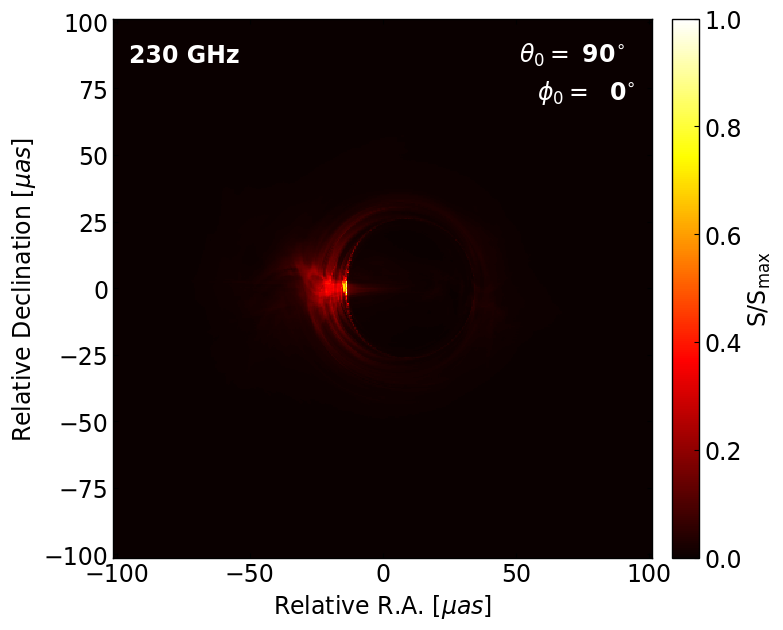

In [16]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name,ifreq=2):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "MADS41A93M"):
        model_str = "bhoss_MA93M"
        ind_start = 101
        ind_end = 200
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==40) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

## Rhigh=1

In [2]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 10, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.306008 at 9001.198332
102, flux: 2.244716 at 9010.849661
103, flux: 2.215922 at 9021.875029
104, flux: 2.213129 at 9031.530561
105, flux: 2.215077 at 9041.192296
106, flux: 2.237446 at 9050.864694
107, flux: 2.238661 at 9061.920379
108, flux: 2.239328 at 9071.596040
109, flux: 2.246626 at 9081.273790
110, flux: 2.253465 at 9090.952675
111, flux: 2.197600 at 9102.013838
112, flux: 2.203535 at 9111.700575
113, flux: 2.252453 at 9121.390170
114, flux: 2.289891 at 9131.076777
115, flux: 2.206414 at 9142.144593
116, flux: 2.196163 at 9151.823466
117, flux: 2.209243 at 9161.489103
118, flux: 2.262288 at 9171.161769
119, flux: 2.301485 at 9180.838314
120, flux: 2.322635 at 9191.897642
121, flux: 2.317256 at 9201.559302
122, flux: 2.274259 at 9211.210651
123, flux: 2.250963 at 9220.861682
124, flux: 2.204550 at 9231.893551
125, flux: 2.1416

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.954250 Jy, the density scale = 7.000000e-19


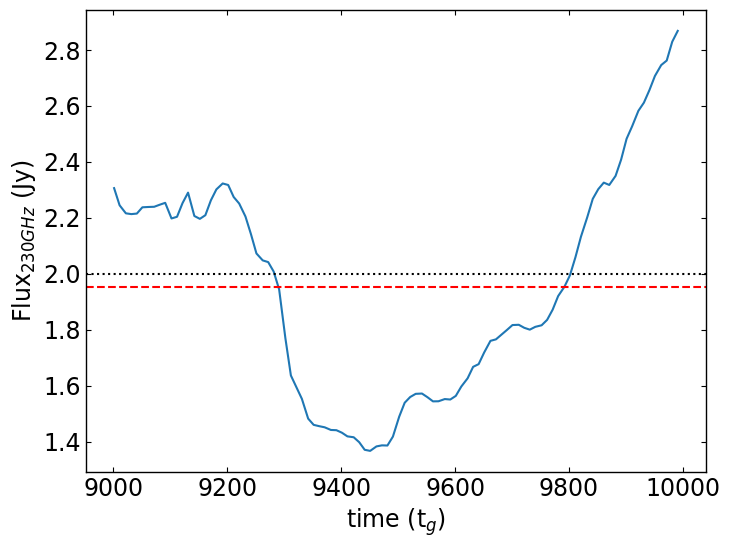

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 50, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.083910 at 9001.198332
102, flux: 2.082316 at 9010.849661
103, flux: 2.084055 at 9021.875029
104, flux: 2.131509 at 9031.530561
105, flux: 2.171668 at 9041.192296
106, flux: 2.217000 at 9050.864694
107, flux: 2.272100 at 9061.920379
108, flux: 2.308212 at 9071.596040
109, flux: 2.336082 at 9081.273790
110, flux: 2.374750 at 9090.952675
111, flux: 2.346776 at 9102.013838
112, flux: 2.364174 at 9111.700575
113, flux: 2.412786 at 9121.390170
114, flux: 2.438955 at 9131.076777
115, flux: 2.393022 at 9142.144593
116, flux: 2.441019 at 9151.823466
117, flux: 2.529904 at 9161.489103
118, flux: 2.632373 at 9171.161769
119, flux: 2.689759 at 9180.838314
120, flux: 2.668563 at 9191.897642
121, flux: 2.569066 at 9201.559302
122, flux: 2.440094 at 9211.210651
123, flux: 2.356771 at 9220.861682
124, flux: 2.263561 at 9231.893551
125, flux: 2.1876

In [7]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [8]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.994204 Jy, the density scale = 6.100000e-19


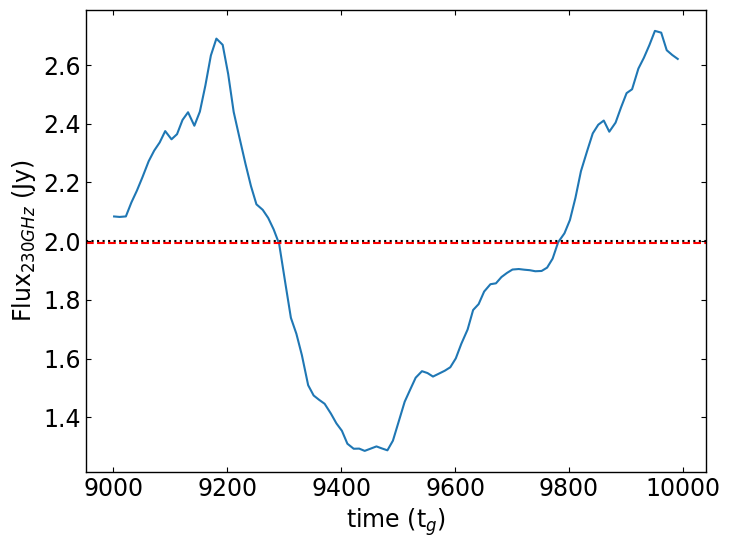

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [10]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 90, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 1.943311 at 9001.198332
102, flux: 1.964204 at 9010.849661
103, flux: 1.992554 at 9021.875029
104, flux: 2.128758 at 9031.530561
105, flux: 2.193418 at 9041.192296
106, flux: 2.274403 at 9050.864694
107, flux: 2.317898 at 9061.920379
108, flux: 2.474038 at 9071.596040
109, flux: 2.504699 at 9081.273790
110, flux: 2.499009 at 9090.952675
111, flux: 2.561602 at 9102.013838
112, flux: 2.631471 at 9111.700575
113, flux: 2.792141 at 9121.390170
114, flux: 2.810039 at 9131.076777
115, flux: 2.867670 at 9142.144593
116, flux: 2.840106 at 9151.823466
117, flux: 2.709848 at 9161.489103
118, flux: 2.618159 at 9171.161769
119, flux: 2.566419 at 9180.838314
120, flux: 2.498684 at 9191.897642
121, flux: 2.456215 at 9201.559302
122, flux: 2.420080 at 9211.210651
123, flux: 2.364172 at 9220.861682
124, flux: 2.307045 at 9231.893551
125, flux: 2.2061

In [11]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [12]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 2.028369 Jy, the density scale = 5.300000e-19


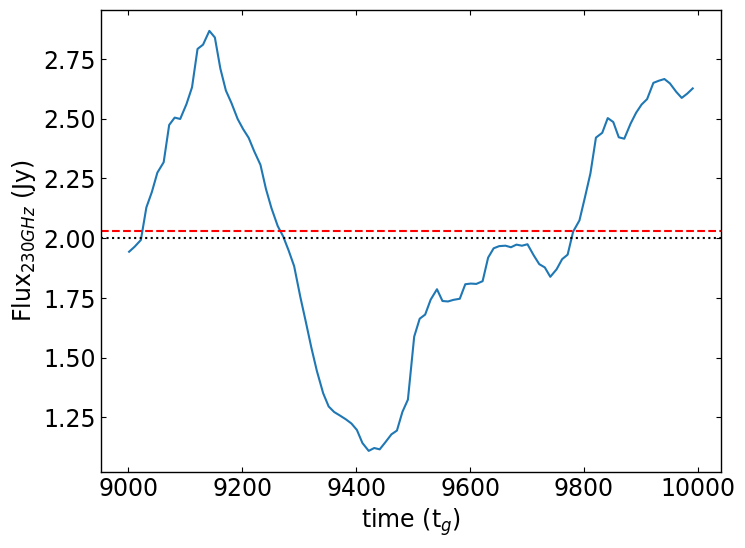

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh=40

In [14]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 10, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.392903 at 9001.198332
102, flux: 2.189174 at 9010.849661
103, flux: 2.091162 at 9021.875029
104, flux: 2.034463 at 9031.530561
105, flux: 2.014176 at 9041.192296
106, flux: 2.016994 at 9050.864694
107, flux: 2.050419 at 9061.920379
108, flux: 2.100853 at 9071.596040
109, flux: 2.160655 at 9081.273790
110, flux: 2.227948 at 9090.952675
111, flux: 2.268133 at 9102.013838
112, flux: 2.309801 at 9111.700575
113, flux: 2.331954 at 9121.390170
114, flux: 2.388059 at 9131.076777
115, flux: 2.398170 at 9142.144593
116, flux: 2.445253 at 9151.823466
117, flux: 2.503719 at 9161.489103
118, flux: 2.665600 at 9171.161769
119, flux: 2.768611 at 9180.838314
120, flux: 2.796464 at 9191.897642
121, flux: 2.783982 at 9201.559302
122, flux: 2.774392 at 9211.210651
123, flux: 2.723878 at 9220.861682
124, flux: 2.681727 at 9231.893551
125, flux: 2.614

In [15]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [16]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.972938 Jy, the density scale = 2.300000e-18


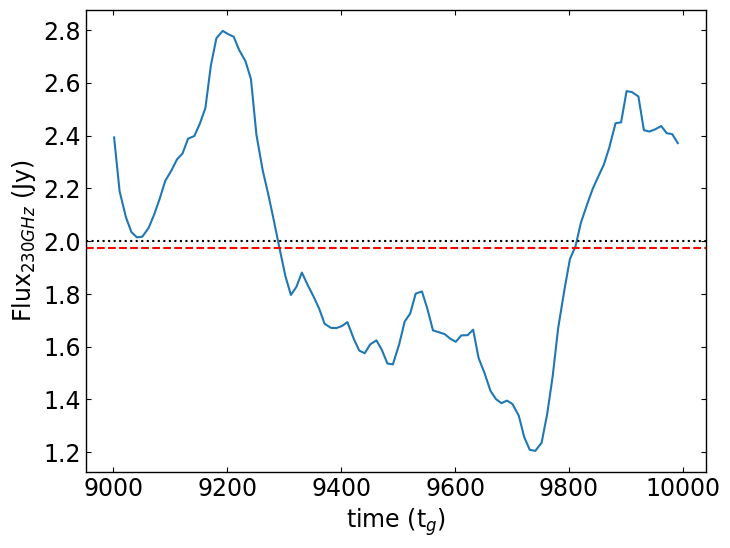

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [18]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 50, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.198130 at 9001.198332
102, flux: 2.204142 at 9010.849661
103, flux: 2.144662 at 9021.875029
104, flux: 2.200986 at 9031.530561
105, flux: 2.224138 at 9041.192296
106, flux: 2.238856 at 9050.864694
107, flux: 2.265490 at 9061.920379
108, flux: 2.310840 at 9071.596040
109, flux: 2.311193 at 9081.273790
110, flux: 2.396550 at 9090.952675
111, flux: 2.498451 at 9102.013838
112, flux: 2.527728 at 9111.700575
113, flux: 2.559652 at 9121.390170
114, flux: 2.665615 at 9131.076777
115, flux: 2.705766 at 9142.144593
116, flux: 2.780552 at 9151.823466
117, flux: 2.788187 at 9161.489103
118, flux: 2.901332 at 9171.161769
119, flux: 3.061004 at 9180.838314
120, flux: 3.116512 at 9191.897642
121, flux: 2.988271 at 9201.559302
122, flux: 2.831713 at 9211.210651
123, flux: 2.705205 at 9220.861682
124, flux: 2.632671 at 9231.893551
125, flux: 2.521

In [19]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [20]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.952934 Jy, the density scale = 1.920000e-18


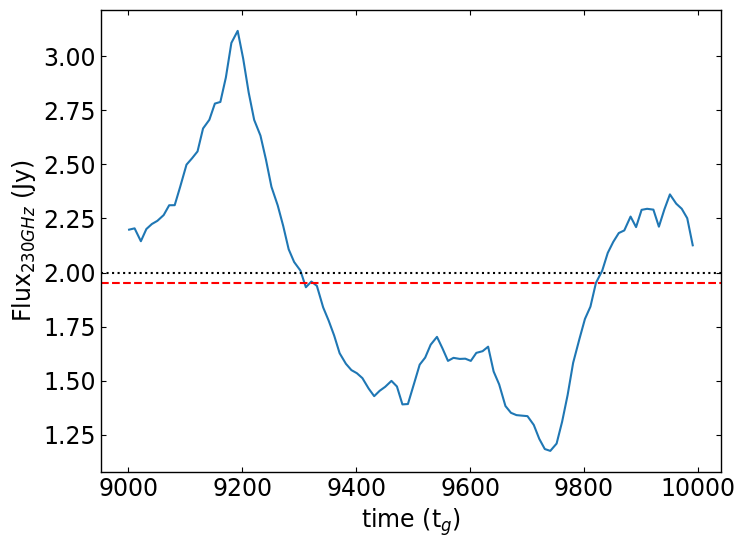

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [22]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 90, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.037282 at 9001.198332
102, flux: 2.104105 at 9010.849661
103, flux: 2.144041 at 9021.875029
104, flux: 2.279456 at 9031.530561
105, flux: 2.346150 at 9041.192296
106, flux: 2.452337 at 9050.864694
107, flux: 2.378068 at 9061.920379
108, flux: 2.427157 at 9071.596040
109, flux: 2.369999 at 9081.273790
110, flux: 2.498968 at 9090.952675
111, flux: 2.633864 at 9102.013838
112, flux: 2.587591 at 9111.700575
113, flux: 2.644721 at 9121.390170
114, flux: 2.848402 at 9131.076777
115, flux: 2.900965 at 9142.144593
116, flux: 2.883357 at 9151.823466
117, flux: 2.903766 at 9161.489103
118, flux: 2.949519 at 9171.161769
119, flux: 2.948844 at 9180.838314
120, flux: 2.958364 at 9191.897642
121, flux: 2.932268 at 9201.559302
122, flux: 2.854415 at 9211.210651
123, flux: 2.791238 at 9220.861682
124, flux: 2.675904 at 9231.893551
125, flux: 2.595

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.979615 Jy, the density scale = 1.700000e-18


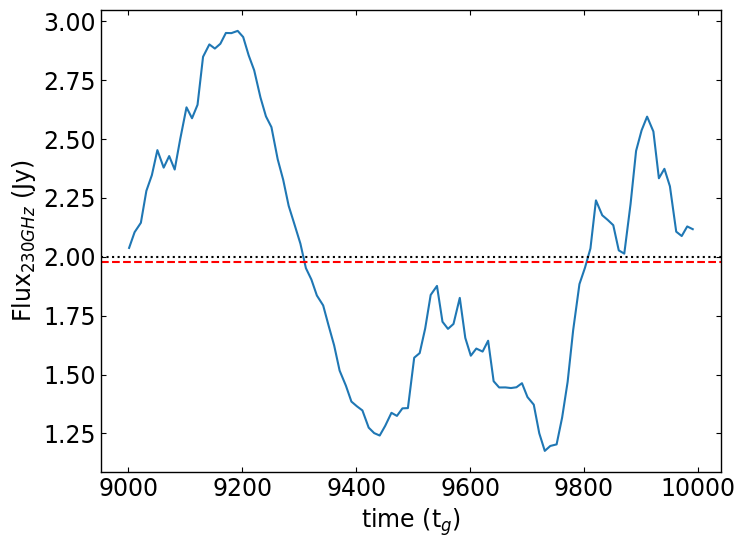

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh=160

In [27]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 10, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.891526 at 9001.198332
102, flux: 2.484407 at 9010.849661
103, flux: 2.292715 at 9021.875029
104, flux: 2.109741 at 9031.530561
105, flux: 2.034462 at 9041.192296
106, flux: 2.052880 at 9050.864694
107, flux: 2.146008 at 9061.920379
108, flux: 2.182899 at 9071.596040
109, flux: 2.204163 at 9081.273790
110, flux: 2.226336 at 9090.952675
111, flux: 2.267334 at 9102.013838
112, flux: 2.319170 at 9111.700575
113, flux: 2.328494 at 9121.390170
114, flux: 2.334525 at 9131.076777
115, flux: 2.342186 at 9142.144593
116, flux: 2.459516 at 9151.823466
117, flux: 2.546921 at 9161.489103
118, flux: 2.754574 at 9171.161769
119, flux: 2.867567 at 9180.838314
120, flux: 2.932535 at 9191.897642
121, flux: 2.931126 at 9201.559302
122, flux: 2.961241 at 9211.210651
123, flux: 2.967486 at 9220.861682
124, flux: 2.896226 at 9231.893551
125, flux: 2.69

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.978040 Jy, the density scale = 4.310000e-18


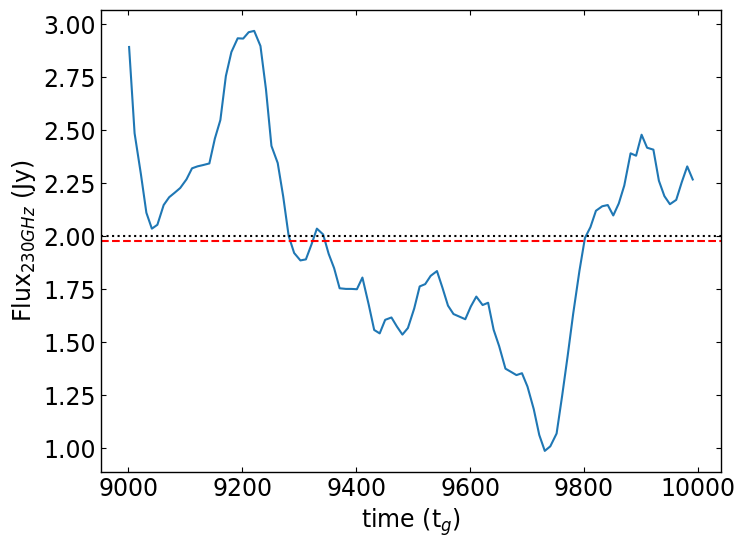

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 50, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.468336 at 9001.198332
102, flux: 2.493432 at 9010.849661
103, flux: 2.349122 at 9021.875029
104, flux: 2.293466 at 9031.530561
105, flux: 2.256288 at 9041.192296
106, flux: 2.289429 at 9050.864694
107, flux: 2.339369 at 9061.920379
108, flux: 2.359710 at 9071.596040
109, flux: 2.312492 at 9081.273790
110, flux: 2.331574 at 9090.952675
111, flux: 2.431566 at 9102.013838
112, flux: 2.469762 at 9111.700575
113, flux: 2.488197 at 9121.390170
114, flux: 2.555062 at 9131.076777
115, flux: 2.590892 at 9142.144593
116, flux: 2.704565 at 9151.823466
117, flux: 2.727912 at 9161.489103
118, flux: 2.902285 at 9171.161769
119, flux: 3.071302 at 9180.838314
120, flux: 3.162862 at 9191.897642
121, flux: 3.025134 at 9201.559302
122, flux: 2.889522 at 9211.210651
123, flux: 2.809984 at 9220.861682
124, flux: 2.729902 at 9231.893551
125, flux: 2.54

In [32]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [33]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.915835 Jy, the density scale = 3.600000e-18


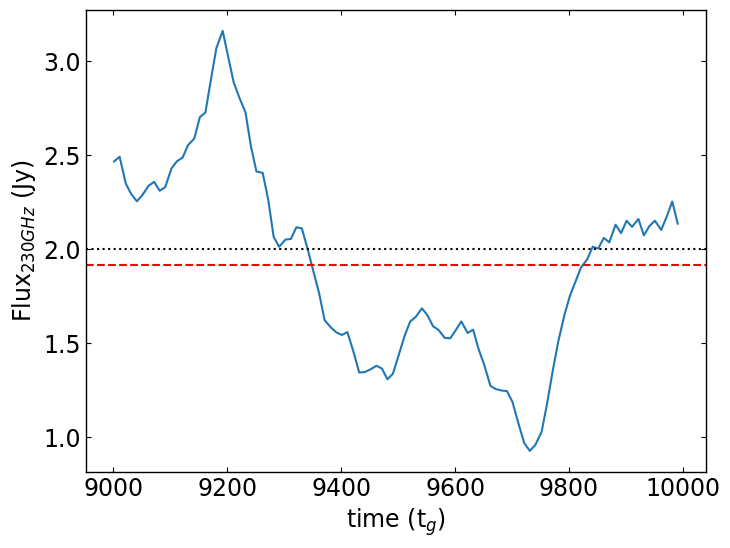

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 90, 0, "MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.232446 at 9001.198332
102, flux: 2.263135 at 9010.849661
103, flux: 2.240657 at 9021.875029
104, flux: 2.257684 at 9031.530561
105, flux: 2.364406 at 9041.192296
106, flux: 2.495573 at 9050.864694
107, flux: 2.467780 at 9061.920379
108, flux: 2.424821 at 9071.596040
109, flux: 2.317428 at 9081.273790
110, flux: 2.367164 at 9090.952675
111, flux: 2.501850 at 9102.013838
112, flux: 2.492027 at 9111.700575
113, flux: 2.467065 at 9121.390170
114, flux: 2.554127 at 9131.076777
115, flux: 2.697379 at 9142.144593
116, flux: 2.704677 at 9151.823466
117, flux: 2.836798 at 9161.489103
118, flux: 2.904903 at 9171.161769
119, flux: 2.927086 at 9180.838314
120, flux: 3.054500 at 9191.897642
121, flux: 3.098546 at 9201.559302
122, flux: 2.958789 at 9211.210651
123, flux: 2.873576 at 9220.861682
124, flux: 2.750577 at 9231.893551
125, flux: 2.56

In [37]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [38]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.914540 Jy, the density scale = 3.200000e-18


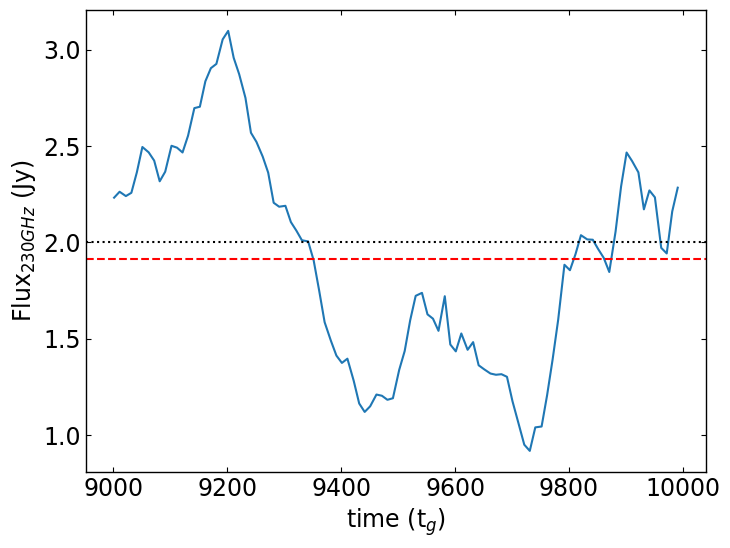

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))